In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]
d2['ratek'] = d2['rate']/1000
d2['CheckpointIntervalK']= d2['CheckpointInterval']/1000.0

/tmp/ipykernel_138283/1711666299.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['ratek'] = d2['rate']/1000
/tmp/ipykernel_138283/1711666299.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['CheckpointIntervalK']= d2['CheckpointInterval']/1000.0


~~~
[INFO] Input: MPOLICY ondemand
[INFO] Input: MQUERY query5
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000
[INFO] Input: NITERS 0
[INFO] Input: FLINK_RATE 6000_300000 12000_300000 18000_300000 24000_300000
[INFO] Input: FLINK_RATE_TYPE static
[INFO] Input: BUFF -1
[INFO] Input: NCORES 16
[INFO] Input: IPWINDOW 10.10.1.3
[INFO] Input: MCFG 1;4;16 1;8;16 1;12;16 1;16;16
[INFO] Input: WINDOW_LENGTH 20
[INFO] Input: FLINK_CHECKPOINTING_ENABLED true
[INFO] Input: FLINK_CHECKPOINTING_INTERVAL 5000 10000 15000
[INFO] Input: FLINK_CHECKPOINTING_MODE exactly_once atleast_once
[INFO] Input: FLINK_ROCKSDB_STATE_BACKEND_ENABLED true
~~~

In [12]:
d2.columns

Index(['Unnamed: 0', 'i', 'itr', 'dvfs', 'rate', 'policy', 'nwindows',
       'CheckpointInterval', 'CheckpointMode', 'pkg_watts_avg',
       'pkg_watts_std', 'ram_watts_avg', 'ram_watts_std',
       'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std',
       'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std',
       'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std',
       'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'WindownumRecordsInPerSecond_avg',
       'WindownumRecordsIn

([<matplotlib.axis.XTick at 0x7f66aa8bcf10>,
 [Text(4, 0, '4'), Text(8, 0, '8'), Text(12, 0, '12'), Text(16, 0, '16')])

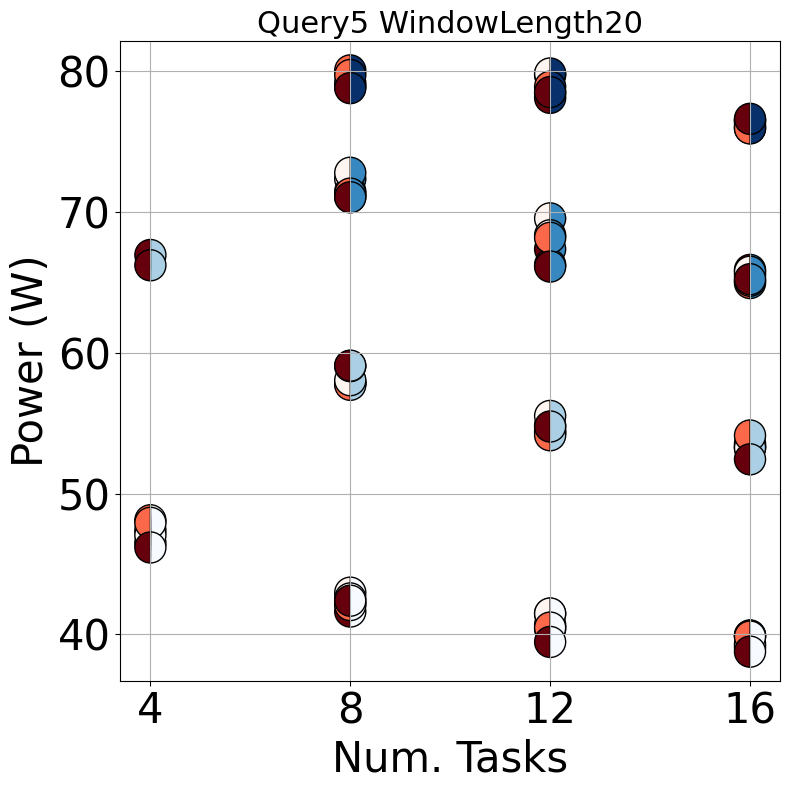

In [16]:
plt.rcParams['figure.figsize'] = 8,8
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

fig, ax = plt.subplots()

#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
scatter_c1 = ax.scatter(d2['nwindows'].tolist(),
                        d2['pkg_watts_avg'].tolist(), s=500, c=d2.ratek, edgecolor="black", 
                        cmap='Blues', marker=MarkerStyle("o", fillstyle="right"))

scatter_c2 = ax.scatter(d2['nwindows'].tolist(),
                        d2['pkg_watts_avg'].tolist(), s=500, c=d2.CheckpointIntervalK, edgecolor="black", 
                        cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

#cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="RPS (K)")
#cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="CheckpointInterval (K)")

ax.set_xlabel('Num. Tasks')
ax.set_ylabel('Power (W)')
#ax.set_xlim(left=left, right=right)
#ax.set_ylim(bottom=35, top=110.0)

ax.set_title(f"Query5 WindowLength20", size=22)
#plt.legend(fontsize=30)
plt.tight_layout()
plt.grid()
plt.xticks(d2.nwindows.unique())

#plt.colorbar(label='RPS (K)')

#plt.xlabel('Num. Tasks')
#plt.ylabel('Power (W)')
#plt.title('Query5 RocksDB WindowLength 20')
#plt.ylim(bottom=0)
#plt.xlim(left=0)

#plt.savefig('q5wl20checkpoints.pdf', bbox_inches='tight')

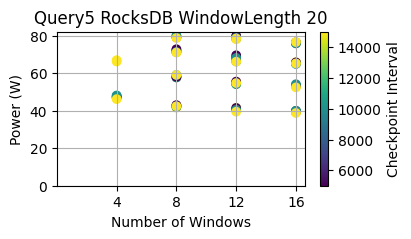

In [5]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['CheckpointInterval'], cmap='viridis')
plt.colorbar(label='Checkpoint Interval')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


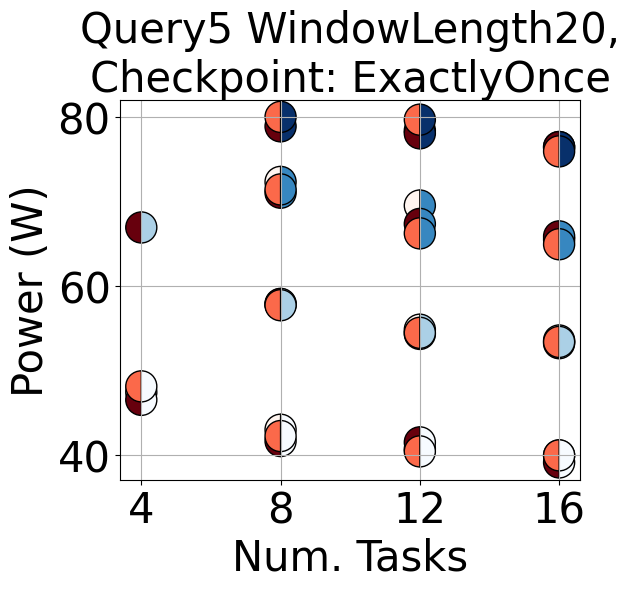

In [25]:
plt.rcParams['figure.figsize'] = 6,6
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
d3 = d2[d2['CheckpointMode'] == 'exactly_once']

fig, ax = plt.subplots()

#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
scatter_c1 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.ratek, edgecolor="black", 
                        cmap='Blues', marker=MarkerStyle("o", fillstyle="right"))

scatter_c2 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.CheckpointIntervalK, edgecolor="black", 
                        cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

#cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="RPS (K)")
#cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="CheckpointInterval (K)")

ax.set_xlabel('Num. Tasks')
ax.set_ylabel('Power (W)')
#ax.set_xlim(left=left, right=right)
#ax.set_ylim(bottom=35, top=110.0)

ax.set_title(f"Query5 WindowLength20,\nCheckpoint: ExactlyOnce", size=30)
#plt.legend(fontsize=30)
plt.tight_layout()
plt.grid()
plt.xticks(d3.nwindows.unique())
plt.savefig("query5windowlen20ckpointexactlyonce.pdf", bbox_inches='tight')

# plt.scatter(d3['nwindows'], d3['pkg_watts_avg'], c=d3['rate'], cmap='viridis')
# plt.colorbar(label='')
# plt.xticks(d3.nwindows.unique())
# plt.xlabel('Number of Windows')
# plt.ylabel('Power (W)')
# plt.title('Query5 RocksDB WindowLength 20, CheckpointMode exactly_once')
# plt.ylim(bottom=0)
# plt.xlim(left=0)
# plt.grid()


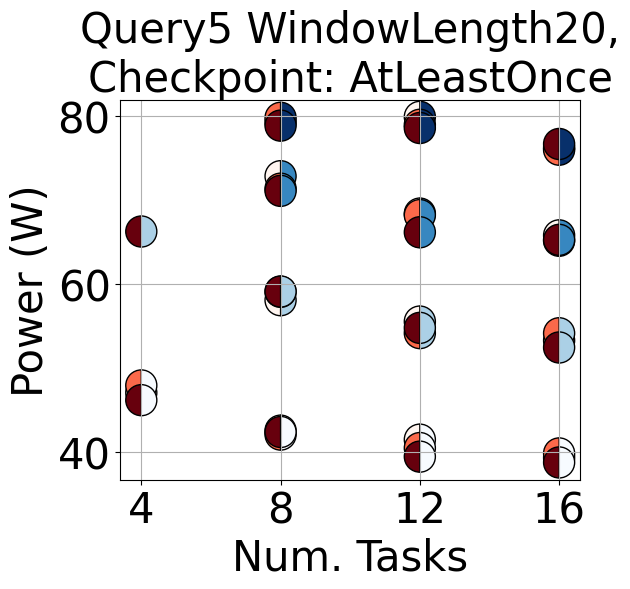

In [26]:
plt.rcParams['figure.figsize'] = 6,6
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
d3 = d2[d2['CheckpointMode'] == 'atleast_once']

fig, ax = plt.subplots()

#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
scatter_c1 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.ratek, edgecolor="black", 
                        cmap='Blues', marker=MarkerStyle("o", fillstyle="right"))

scatter_c2 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.CheckpointIntervalK, edgecolor="black", 
                        cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

#cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="RPS (K)")
#cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="CheckpointInterval (K)")

ax.set_xlabel('Num. Tasks')
ax.set_ylabel('Power (W)')
#ax.set_xlim(left=left, right=right)
#ax.set_ylim(bottom=35, top=110.0)

ax.set_title(f"Query5 WindowLength20,\nCheckpoint: AtLeastOnce", size=30)
#plt.legend(fontsize=30)
plt.tight_layout()
plt.grid()
plt.xticks(d3.nwindows.unique())
plt.savefig("query5windowlen20ckpointatleastonce.pdf", bbox_inches='tight')

# plt.scatter(d3['nwindows'], d3['pkg_watts_avg'], c=d3['rate'], cmap='viridis')
# plt.colorbar(label='')
# plt.xticks(d3.nwindows.unique())
# plt.xlabel('Number of Windows')
# plt.ylabel('Power (W)')
# plt.title('Query5 RocksDB WindowLength 20, CheckpointMode exactly_once')
# plt.ylim(bottom=0)
# plt.xlim(left=0)
# plt.grid()
